# Pillow Basics

In [15]:
import PIL

In [4]:
PIL.__version__

'8.2.0'

In [5]:
help(PIL)

Help on package PIL:

NAME
    PIL - Pillow (Fork of the Python Imaging Library)

DESCRIPTION
    Pillow is the friendly PIL fork by Alex Clark and Contributors.
        https://github.com/python-pillow/Pillow/
    
    Pillow is forked from PIL 1.1.7.
    
    PIL is the Python Imaging Library by Fredrik Lundh and Contributors.
    Copyright (c) 1999 by Secret Labs AB.
    
    Use PIL.__version__ for this Pillow version.
    
    ;-)

PACKAGE CONTENTS
    BdfFontFile
    BlpImagePlugin
    BmpImagePlugin
    BufrStubImagePlugin
    ContainerIO
    CurImagePlugin
    DcxImagePlugin
    DdsImagePlugin
    EpsImagePlugin
    ExifTags
    FitsStubImagePlugin
    FliImagePlugin
    FontFile
    FpxImagePlugin
    FtexImagePlugin
    GbrImagePlugin
    GdImageFile
    GifImagePlugin
    GimpGradientFile
    GimpPaletteFile
    GribStubImagePlugin
    Hdf5StubImagePlugin
    IcnsImagePlugin
    IcoImagePlugin
    ImImagePlugin
    Image
    ImageChops
    ImageCms
    ImageColor
    ImageDr

In [2]:
from PIL import Image
help(Image)

ge
     |  
     |  toqpixmap(self)
     |      Returns a QPixmap copy of this image
     |  
     |  transform(self, size, method, data=None, resample=0, fill=1, fillcolor=None)
     |      Transforms this image.  This method creates a new image with the
     |      given size, and the same mode as the original, and copies data
     |      to the new image using the given transform.
     |      
     |      :param size: The output size.
     |      :param method: The transformation method.  This is one of
     |        :py:data:`PIL.Image.EXTENT` (cut out a rectangular subregion),
     |        :py:data:`PIL.Image.AFFINE` (affine transform),
     |        :py:data:`PIL.Image.PERSPECTIVE` (perspective transform),
     |        :py:data:`PIL.Image.QUAD` (map a quadrilateral to a rectangle), or
     |        :py:data:`PIL.Image.MESH` (map a number of source quadrilaterals
     |        in one operation).
     |      
     |        It may also be an :py:class:`~PIL.Image.ImageTransformHan

In [3]:
help(Image.open)

Help on function open in module PIL.Image:

open(fp, mode='r', formats=None)
    Opens and identifies the given image file.
    
    This is a lazy operation; this function identifies the file, but
    the file remains open and the actual image data is not read from
    the file until you try to process the data (or call the
    :py:meth:`~PIL.Image.Image.load` method).  See
    :py:func:`~PIL.Image.new`. See :ref:`file-handling`.
    
    :param fp: A filename (string), pathlib.Path object or a file object.
       The file object must implement ``file.read``,
       ``file.seek``, and ``file.tell`` methods,
       and be opened in binary mode.
    :param mode: The mode.  If given, this argument must be "r".
    :param formats: A list or tuple of formats to attempt to load the file in.
       This can be used to restrict the set of formats checked.
       Pass ``None`` to try all supported formats. You can print the set of
       available formats by running ``python -m PIL`` or using


In [5]:
file="test.gif"
image=Image.open(file)
print(image)

<PIL.GifImagePlugin.GifImageFile image mode=P size=480x366 at 0x1A8037AB070>


In [7]:
import inspect
print("the type of the image is " + str(type(image)))
inspect.getmro(type(image))

the type of the image is <class 'PIL.GifImagePlugin.GifImageFile'>


(PIL.GifImagePlugin.GifImageFile,
 PIL.ImageFile.ImageFile,
 PIL.Image.Image,
 object)

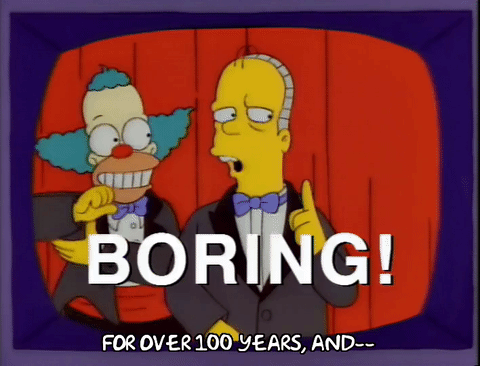

In [8]:
from IPython.display import display
display(image)

As markdown

![boring](test.gif)

In [11]:
help(image.copy)

Help on method copy in module PIL.Image:

copy() method of PIL.GifImagePlugin.GifImageFile instance
    Copies this image. Use this method if you wish to paste things
    into an image, but still retain the original.
    
    :rtype: :py:class:`~PIL.Image.Image`
    :returns: An :py:class:`~PIL.Image.Image` object.



In [12]:
help(image.save)

Help on method save in module PIL.Image:

save(fp, format=None, **params) method of PIL.GifImagePlugin.GifImageFile instance
    Saves this image under the given filename.  If no format is
    specified, the format to use is determined from the filename
    extension, if possible.
    
    Keyword options can be used to provide additional instructions
    to the writer. If a writer doesn't recognise an option, it is
    silently ignored. The available options are described in the
    :doc:`image format documentation
    <../handbook/image-file-formats>` for each writer.
    
    You can use a file object instead of a filename. In this case,
    you must always specify the format. The file object must
    implement the ``seek``, ``tell``, and ``write``
    methods, and be opened in binary mode.
    
    :param fp: A filename (string), pathlib.Path object or file object.
    :param format: Optional format override.  If omitted, the
       format to use is determined from the filename ext

In [13]:
from PIL import ImageFilter
help(ImageFilter)

alues. The number
     |                       of arguments which function should take is
     |                       ``self.channels`` or ``3 + self.channels``
     |                       if ``with_normals`` flag is set.
     |                       Should return a tuple of ``self.channels`` or
     |                       ``channels`` elements if it is set.
     |      :param with_normals: If true, ``callback`` will be called with
     |                           coordinates in the color cube as the first
     |                           three arguments. Otherwise, ``callback``
     |                           will be called only with actual color values.
     |      :param channels: The number of channels in the resulting lookup table.
     |      :param target_mode: Passed to the constructor of the resulting
     |                          lookup table.
     |  
     |  ----------------------------------------------------------------------
     |  Class methods defined here:
    

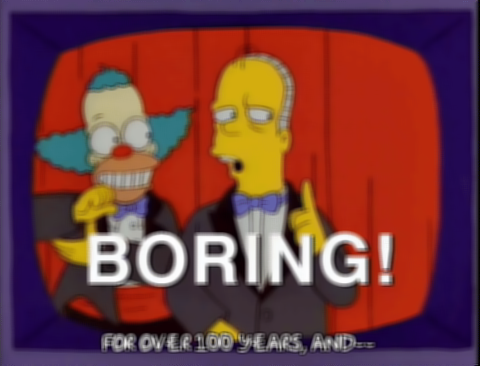

In [16]:
image=image.convert('RGB')
blurred_image=image.filter(PIL.ImageFilter.BLUR)
display(blurred_image)

In [17]:
print("{}x{}".format(image.width, image.height))

480x366


In [18]:
help(image.crop)

Help on method crop in module PIL.Image:

crop(box=None) method of PIL.Image.Image instance
    Returns a rectangular region from this image. The box is a
    4-tuple defining the left, upper, right, and lower pixel
    coordinate. See :ref:`coordinate-system`.
    
    Note: Prior to Pillow 3.4.0, this was a lazy operation.
    
    :param box: The crop rectangle, as a (left, upper, right, lower)-tuple.
    :rtype: :py:class:`~PIL.Image.Image`
    :returns: An :py:class:`~PIL.Image.Image` object.



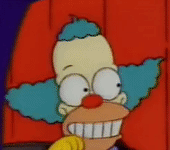

In [24]:
display(image.crop((30,50,200,200)))

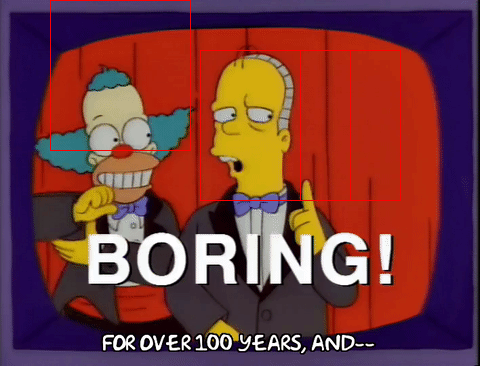

In [29]:
from PIL import ImageDraw
drawing_object=ImageDraw.Draw(image)
drawing_object.rectangle((200,50,300,200), fill = None, outline ='red')
display(image)

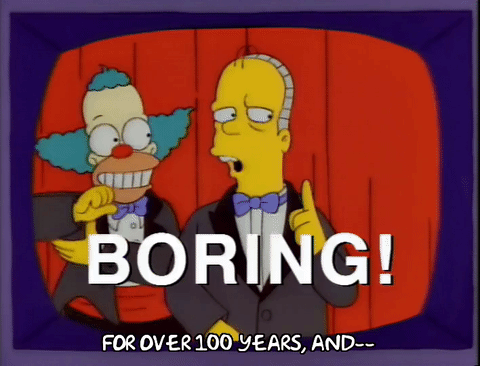

In [30]:
file="test.gif"
image=Image.open(file).convert('RGB')

display(image)

In [31]:
from PIL import ImageEnhance
enhancer=ImageEnhance.Brightness(image)
images=[]
for i in range(0, 10):
    images.append(enhancer.enhance(i/10))
print(images)

[<PIL.Image.Image image mode=RGB size=480x366 at 0x1A8054E1460>, <PIL.Image.Image image mode=RGB size=480x366 at 0x1A8054E1E20>, <PIL.Image.Image image mode=RGB size=480x366 at 0x1A8054E1AC0>, <PIL.Image.Image image mode=RGB size=480x366 at 0x1A8054E1B50>, <PIL.Image.Image image mode=RGB size=480x366 at 0x1A8054E1AF0>, <PIL.Image.Image image mode=RGB size=480x366 at 0x1A8054E1700>, <PIL.Image.Image image mode=RGB size=480x366 at 0x1A8054E1730>, <PIL.Image.Image image mode=RGB size=480x366 at 0x1A8054E1DF0>, <PIL.Image.Image image mode=RGB size=480x366 at 0x1A8054E1760>, <PIL.Image.Image image mode=RGB size=480x366 at 0x1A8054DFFD0>]


In [32]:
help(PIL.Image.new)

Help on function new in module PIL.Image:

new(mode, size, color=0)
    Creates a new image with the given mode and size.
    
    :param mode: The mode to use for the new image. See:
       :ref:`concept-modes`.
    :param size: A 2-tuple, containing (width, height) in pixels.
    :param color: What color to use for the image.  Default is black.
       If given, this should be a single integer or floating point value
       for single-band modes, and a tuple for multi-band modes (one value
       per band).  When creating RGB images, you can also use color
       strings as supported by the ImageColor module.  If the color is
       None, the image is not initialised.
    :returns: An :py:class:`~PIL.Image.Image` object.



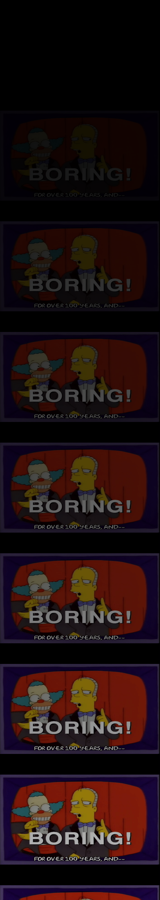

In [35]:
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width,10*first_image.height))
current_location = 0
for img in images:
    contact_sheet.paste(img, (0, current_location) )
    current_location=current_location+450
contact_sheet = contact_sheet.resize((160,900) )
display(contact_sheet)

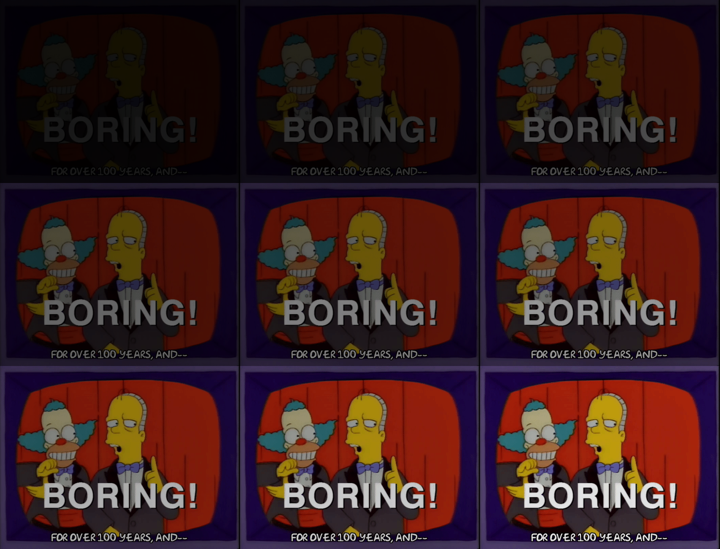

In [36]:
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))

x=0
y=0

for img in images[1:]:
    contact_sheet.paste(img, (x, y) )
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))

display(contact_sheet)